In [77]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix

import warnings
warnings.filterwarnings('ignore')


In [78]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')

In [79]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [80]:
df.shape

(8523, 12)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [82]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [83]:
df['Item_Weight'] = df['Item_Weight'].fillna(np.mean(df['Item_Weight']))

In [84]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [85]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [86]:
df.duplicated().sum().sum()

0

In [87]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [88]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [89]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Encoding

In [90]:
le = LabelEncoder()

In [91]:
df['Item_Identifier'] = le.fit_transform(df['Item_Identifier'])

df['Item_Fat_Content'] = le.fit_transform(df['Item_Fat_Content'])

df['Item_Type'] = le.fit_transform(df['Item_Type'])

df['Outlet_Identifier'] = le.fit_transform(df['Outlet_Identifier'])

df['Outlet_Size'] = le.fit_transform(df['Outlet_Size'])

df['Outlet_Location_Type'] = le.fit_transform(df['Outlet_Location_Type'])

df['Outlet_Type'] = le.fit_transform(df['Outlet_Type'])

In [92]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


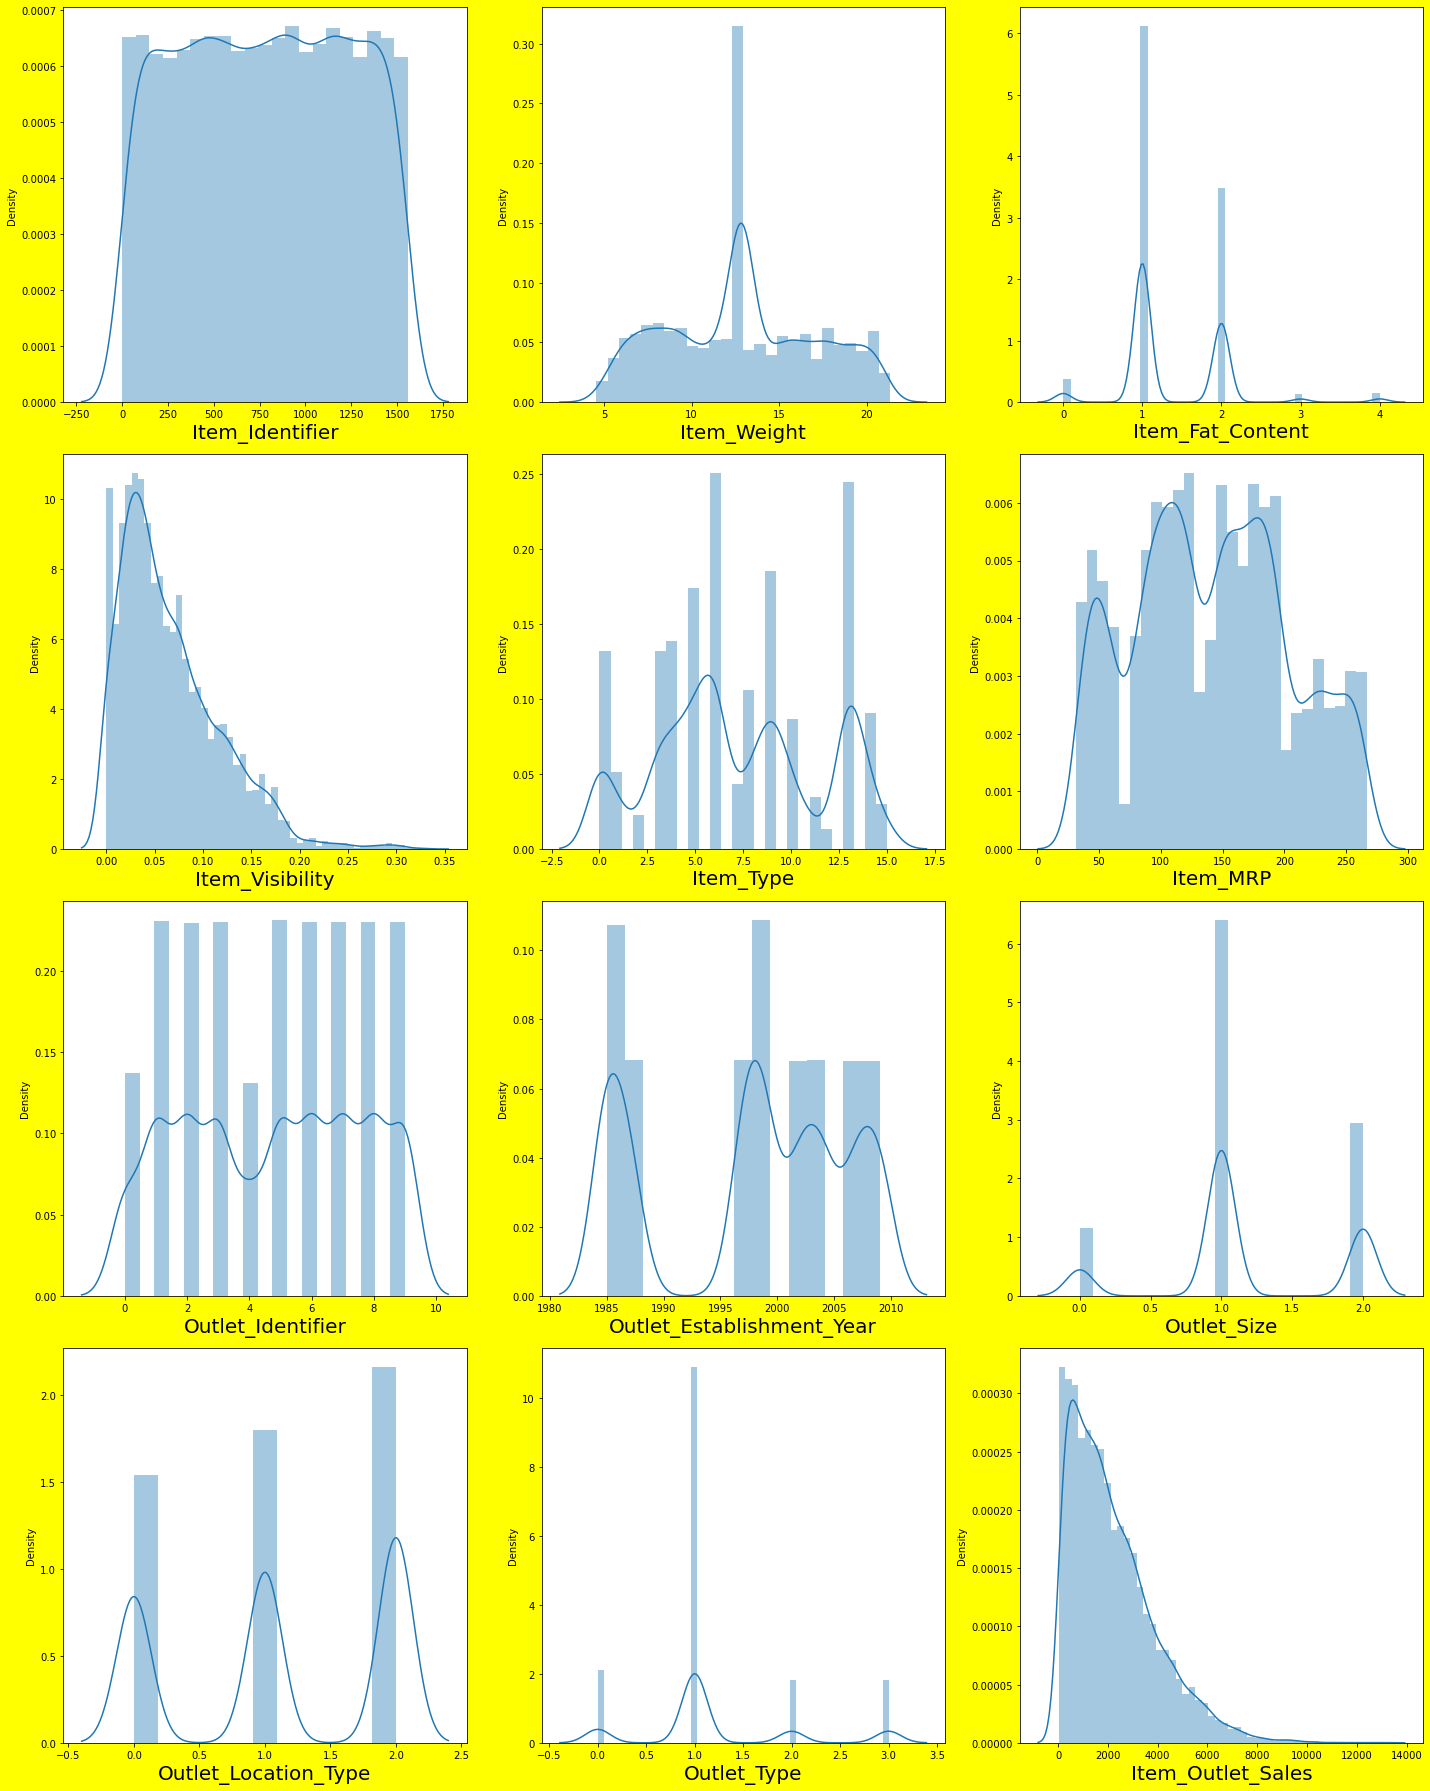

In [93]:
plt.figure(figsize=(20,25), facecolor='yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
        plotnumber += 1
plt.tight_layout()

In [94]:
df.skew()

Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Fat_Content             0.994824
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

In [95]:
from sklearn.preprocessing import PowerTransformer, power_transform

In [96]:
df_new = power_transform(df)

In [97]:
df = pd.DataFrame(df_new, columns=df.columns)

In [98]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-1.461039,-0.822636,-0.520977,-1.146886,-0.712347,1.623670,1.427394,0.048562,-0.293295,-1.373843,-0.123488,0.985078
1,-2.093858,-1.733801,1.009871,-1.037100,1.504660,-1.595016,-0.548577,1.461925,-0.293295,1.088324,1.040591,-1.218135
2,-0.154018,1.086362,-0.520977,-1.122375,0.684390,0.081237,1.427394,0.048562,-0.293295,-1.373843,-0.123488,0.220360
3,0.773522,1.447728,1.009871,-1.745551,-0.215420,0.689968,-1.809119,-0.075796,-0.293295,1.088324,-1.915952,-0.835183
4,1.098294,-0.917588,-0.520977,-1.745551,0.468410,-1.476078,-1.343810,-1.270835,-1.925925,1.088324,-0.123488,-0.566616
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-0.844393,-1.468096,-0.520977,0.020310,1.305304,1.148258,-1.343810,-1.270835,-1.925925,1.088324,-0.123488,0.573946
8519,0.338073,-1.060659,1.009871,-0.221388,-1.923750,-0.463127,0.810513,0.439191,-0.293295,-0.131113,-0.123488,-1.062855
8520,1.206073,-0.496556,-0.520977,-0.542979,0.246996,-0.867930,0.489168,0.714912,1.390694,-0.131113,-0.123488,-0.393044
8521,-0.112559,-1.373443,1.009871,1.459990,1.305304,-0.548996,-0.548577,1.461925,-0.293295,1.088324,1.040591,0.070669


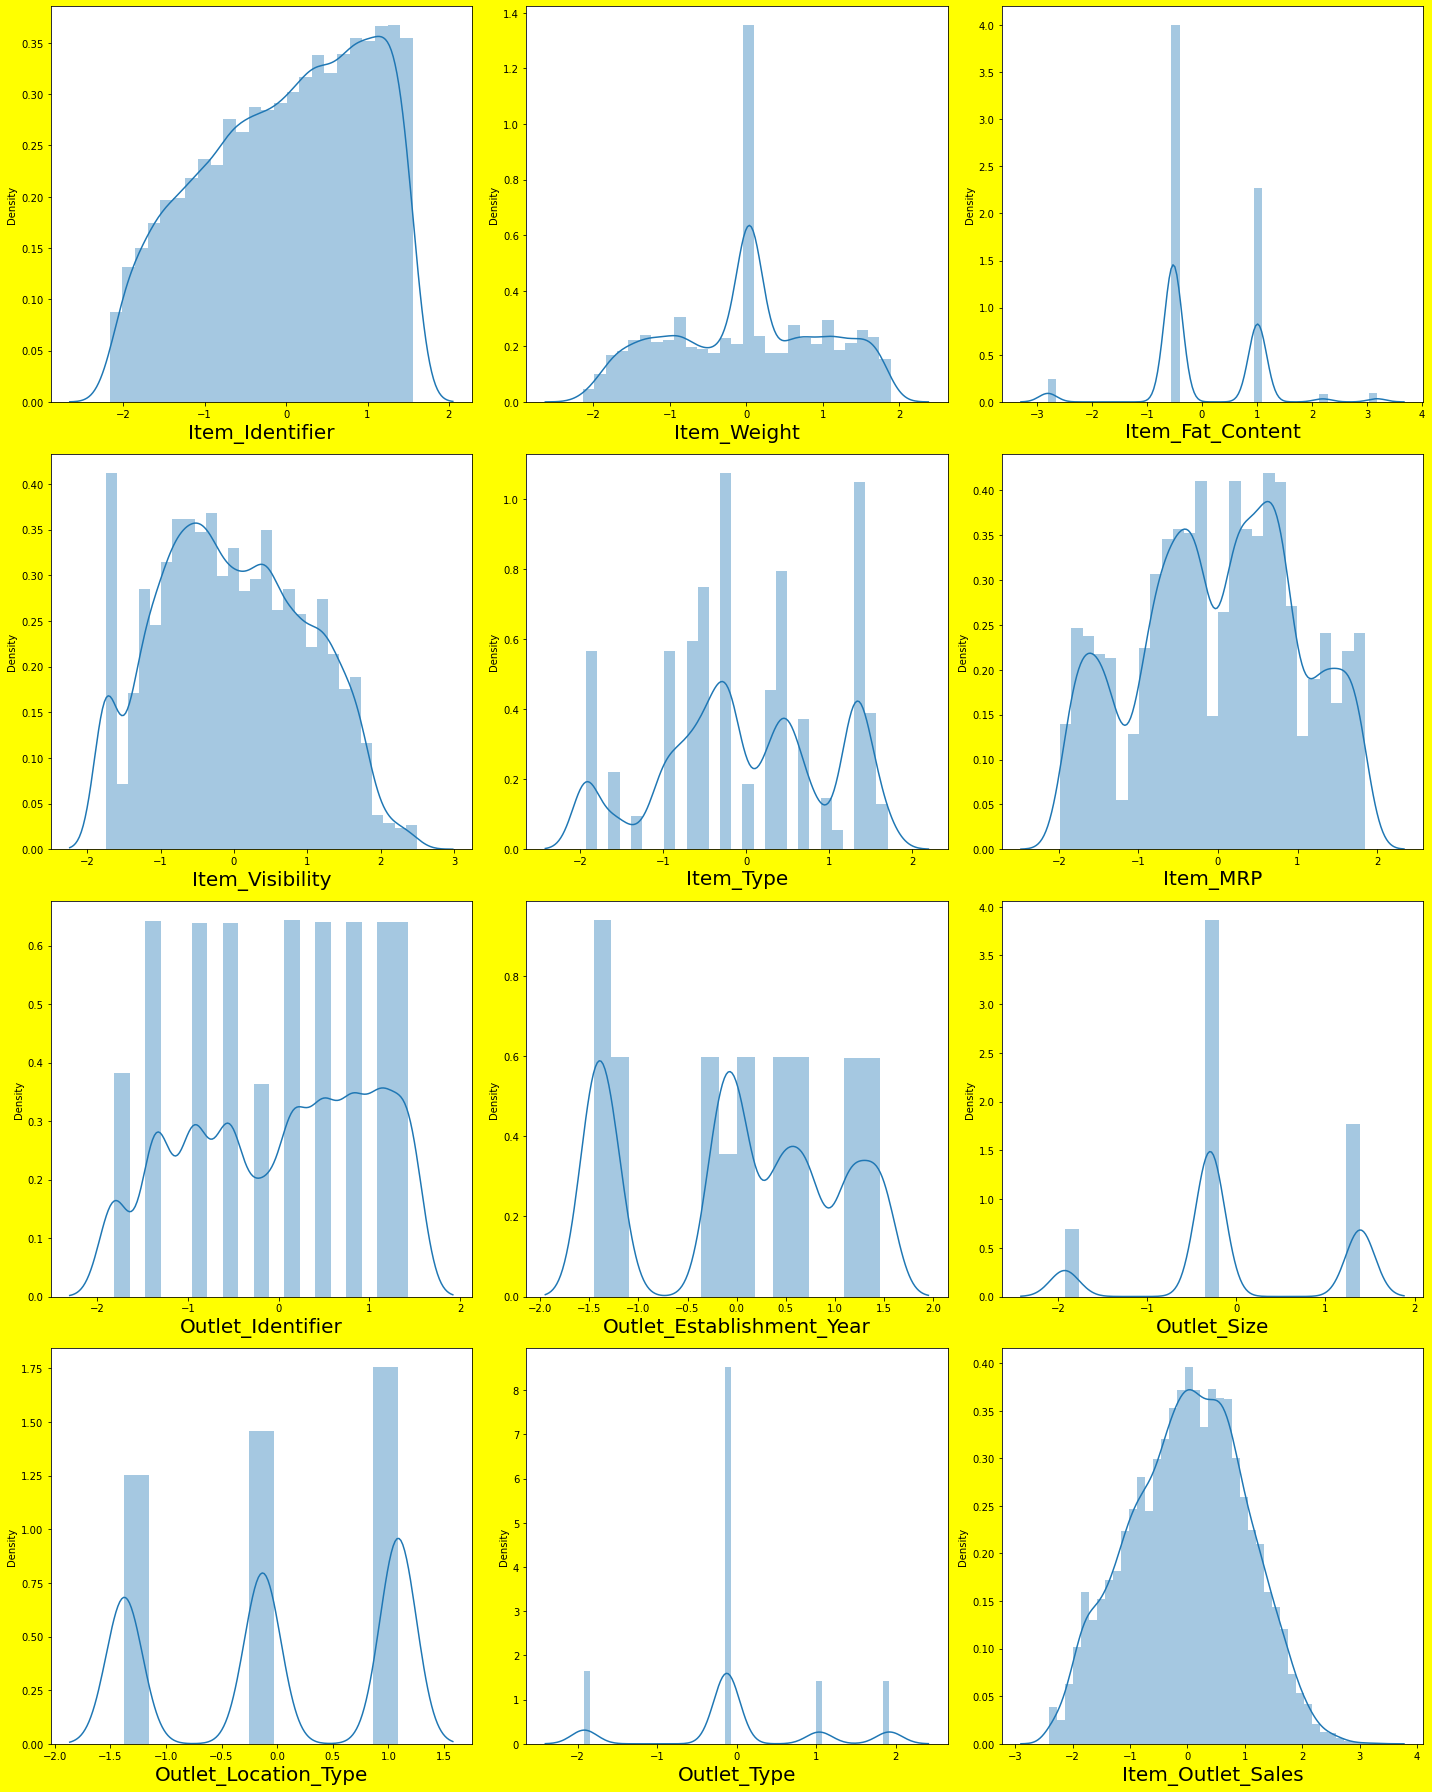

In [99]:
plt.figure(figsize=(20,25), facecolor='yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
        plotnumber += 1
plt.tight_layout()

In [100]:
df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044711,-0.068874,-0.019903,-0.033707,0.017128,-0.008186,-0.012575,0.001567,0.003721,-0.003784,0.005620
Item_Weight,0.044711,1.000000,-0.016132,-0.009724,0.033448,0.023989,-0.008198,-0.021743,-0.004495,0.005878,0.003867,0.009947
Item_Fat_Content,-0.068874,-0.016132,1.000000,0.040710,-0.122519,0.000833,0.000128,-0.001623,-0.011791,-0.005850,-0.002564,0.010085
Item_Visibility,-0.019903,-0.009724,0.040710,1.000000,-0.042060,0.002544,-0.082740,-0.054995,0.053843,-0.021177,-0.170164,-0.135167
Item_Type,-0.033707,0.033448,-0.122519,-0.042060,1.000000,0.037985,0.001452,0.004720,-0.002483,0.003368,0.003444,0.021701
Item_MRP,0.017128,0.023989,0.000833,0.002544,0.037985,1.000000,0.003821,0.004448,0.006547,-0.000175,-0.000489,0.558871
Outlet_Identifier,-0.008186,-0.008198,0.000128,-0.082740,0.001452,0.003821,1.000000,0.043914,0.516547,-0.706032,0.197759,0.240768
Outlet_Establishment_Year,-0.012575,-0.021743,-0.001623,-0.054995,0.004720,0.004448,0.043914,1.000000,0.169942,-0.043967,0.028777,0.033843
Outlet_Size,0.001567,-0.004495,-0.011791,0.053843,-0.002483,0.006547,0.516547,0.169942,1.000000,-0.614159,-0.223214,-0.111374
Outlet_Location_Type,0.003721,0.005878,-0.005850,-0.021177,0.003368,-0.000175,-0.706032,-0.043967,-0.614159,1.000000,0.407802,0.072838


<AxesSubplot:>

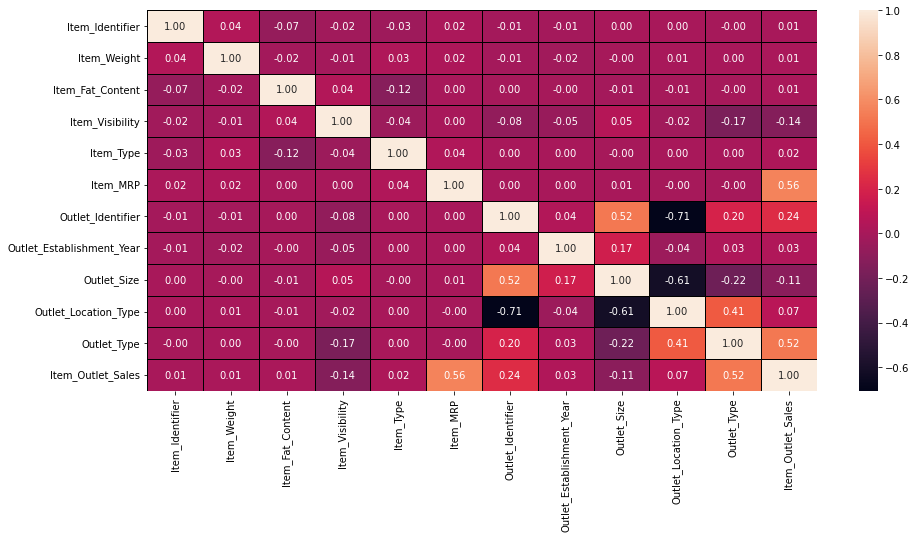

In [101]:
plt.figure(figsize=(15,7))

sns.heatmap(df.corr(), annot=True, linewidth=0.5, linecolor='black', fmt='0.2f')

In [102]:
df.corr()['Item_Outlet_Sales']

Item_Identifier              0.005620
Item_Weight                  0.009947
Item_Fat_Content             0.010085
Item_Visibility             -0.135167
Item_Type                    0.021701
Item_MRP                     0.558871
Outlet_Identifier            0.240768
Outlet_Establishment_Year    0.033843
Outlet_Size                 -0.111374
Outlet_Location_Type         0.072838
Outlet_Type                  0.519572
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

As we can see Item Identifier and Item Weight have very negligible correlation with Sales, will drop that

In [103]:
df = df.drop(columns = ['Item_Identifier','Item_Weight'])
df

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-0.520977,-1.146886,-0.712347,1.623670,1.427394,0.048562,-0.293295,-1.373843,-0.123488,0.985078
1,1.009871,-1.037100,1.504660,-1.595016,-0.548577,1.461925,-0.293295,1.088324,1.040591,-1.218135
2,-0.520977,-1.122375,0.684390,0.081237,1.427394,0.048562,-0.293295,-1.373843,-0.123488,0.220360
3,1.009871,-1.745551,-0.215420,0.689968,-1.809119,-0.075796,-0.293295,1.088324,-1.915952,-0.835183
4,-0.520977,-1.745551,0.468410,-1.476078,-1.343810,-1.270835,-1.925925,1.088324,-0.123488,-0.566616
...,...,...,...,...,...,...,...,...,...,...
8518,-0.520977,0.020310,1.305304,1.148258,-1.343810,-1.270835,-1.925925,1.088324,-0.123488,0.573946
8519,1.009871,-0.221388,-1.923750,-0.463127,0.810513,0.439191,-0.293295,-0.131113,-0.123488,-1.062855
8520,-0.520977,-0.542979,0.246996,-0.867930,0.489168,0.714912,1.390694,-0.131113,-0.123488,-0.393044
8521,1.009871,1.459990,1.305304,-0.548996,-0.548577,1.461925,-0.293295,1.088324,1.040591,0.070669


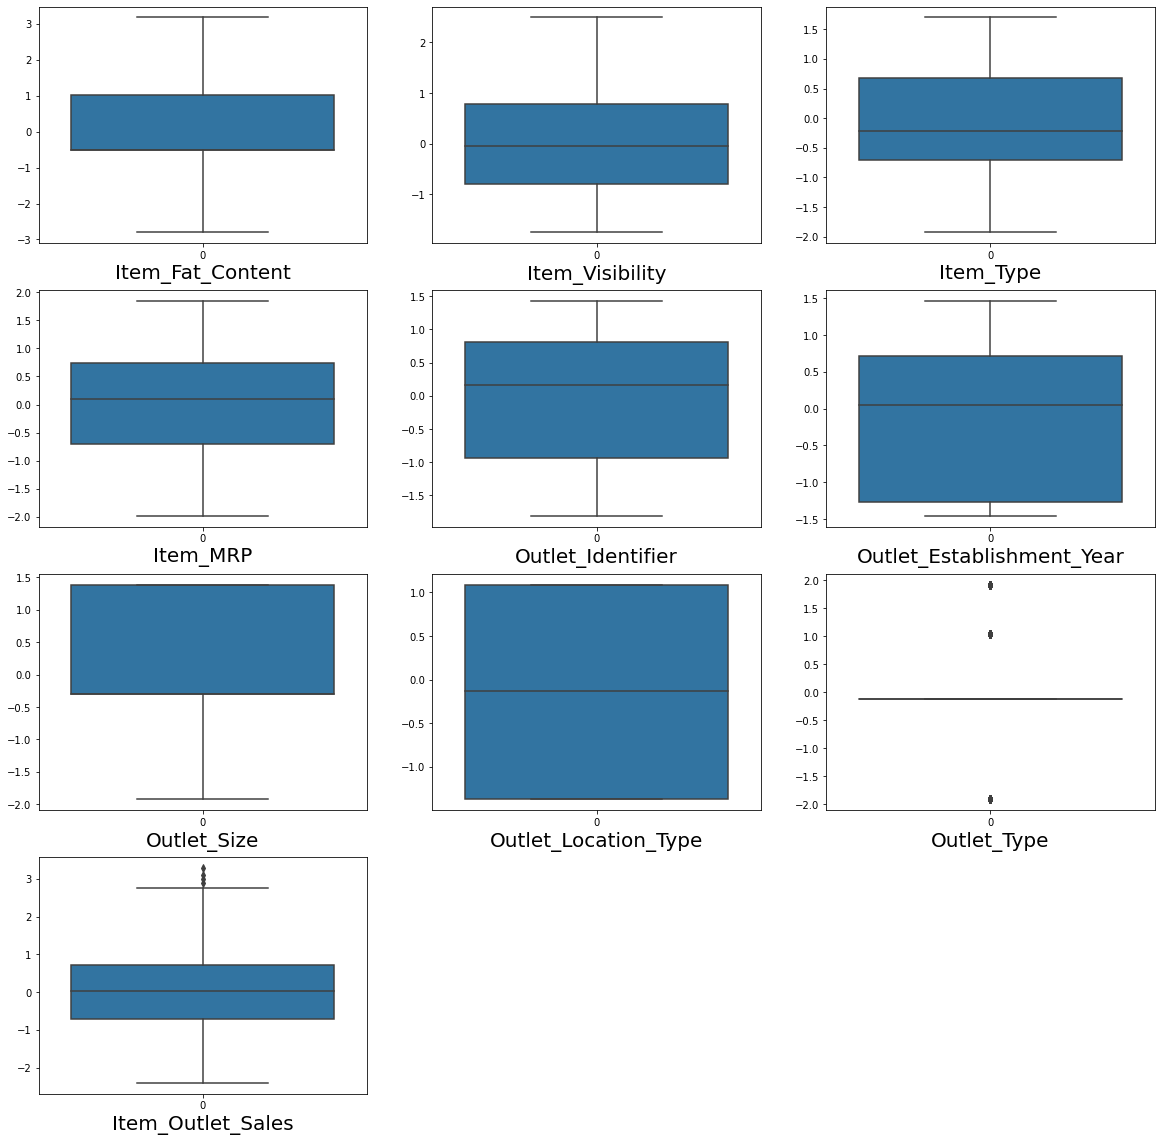

In [107]:
plt.figure(figsize=(20,20))
z=1

for column in df:
    if z<= 10:
        plt.subplot(4,3,z)
        sns.boxplot(data = df[column])
        plt.xlabel(column, fontsize=20)
        z += 1
        
plt.show()

In [109]:
from scipy.stats import zscore

In [110]:
np.abs(zscore(df) < 3).all().all()

False

In [112]:
abs_zs = zscore(df)


In [113]:
filtering_entry = (abs_zs < 3).all(axis=1)

In [114]:
filtering_entry.sum()

8404

In [116]:
filtering_entry

0       True
1       True
2       True
3       True
4       True
        ... 
8518    True
8519    True
8520    True
8521    True
8522    True
Length: 8523, dtype: bool

In [119]:
df = df[filtering_entry]
df

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-0.520977,-1.146886,-0.712347,1.623670,1.427394,0.048562,-0.293295,-1.373843,-0.123488,0.985078
1,1.009871,-1.037100,1.504660,-1.595016,-0.548577,1.461925,-0.293295,1.088324,1.040591,-1.218135
2,-0.520977,-1.122375,0.684390,0.081237,1.427394,0.048562,-0.293295,-1.373843,-0.123488,0.220360
3,1.009871,-1.745551,-0.215420,0.689968,-1.809119,-0.075796,-0.293295,1.088324,-1.915952,-0.835183
4,-0.520977,-1.745551,0.468410,-1.476078,-1.343810,-1.270835,-1.925925,1.088324,-0.123488,-0.566616
...,...,...,...,...,...,...,...,...,...,...
8518,-0.520977,0.020310,1.305304,1.148258,-1.343810,-1.270835,-1.925925,1.088324,-0.123488,0.573946
8519,1.009871,-0.221388,-1.923750,-0.463127,0.810513,0.439191,-0.293295,-0.131113,-0.123488,-1.062855
8520,-0.520977,-0.542979,0.246996,-0.867930,0.489168,0.714912,1.390694,-0.131113,-0.123488,-0.393044
8521,1.009871,1.459990,1.305304,-0.548996,-0.548577,1.461925,-0.293295,1.088324,1.040591,0.070669


Testing Data

In [123]:
dft = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
dft

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [125]:
dft = dft.drop(columns = ['Item_Identifier','Item_Weight'])
dft

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [126]:
dft['Item_Fat_Content'] = le.fit_transform(dft['Item_Fat_Content'])

dft['Item_Type'] = le.fit_transform(dft['Item_Type'])

dft['Outlet_Identifier'] = le.fit_transform(dft['Outlet_Identifier'])

dft['Outlet_Size'] = le.fit_transform(dft['Outlet_Size'])

dft['Outlet_Location_Type'] = le.fit_transform(dft['Outlet_Location_Type'])

dft['Outlet_Type'] = le.fit_transform(dft['Outlet_Type'])

In [128]:
xtest = dft

In [129]:
xtest

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1,0.007565,13,107.8622,9,1999,1,0,1
1,4,0.038428,4,87.3198,2,2007,3,1,1
2,1,0.099575,11,241.7538,0,1998,3,2,0
3,1,0.015388,13,155.0340,2,2007,3,1,1
4,2,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...
5676,2,0.013496,13,141.3154,8,1997,2,0,1
5677,2,0.142991,15,169.1448,3,2009,1,2,2
5678,1,0.073529,8,118.7440,7,2002,3,1,1
5679,2,0.000000,3,214.6218,2,2007,3,1,1


In [130]:
# Training Data

x = df.drop(columns=['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

In [133]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
lr=LinearRegression()

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

from sklearn.metrics import r2_score


# Linear Regression

In [135]:
maxr2 = 0
maxRS = 0

for i in range(0,200):
    x_train,x_test, y_train, y_test = train_test_split(x,y,train_size=0.75, random_state=i)
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    scr = r2_score(y_test,y_pred)
    print('accuracy', scr, 'random state',i)
    
    if scr > maxr2:
        maxScore = scr
        maxRS = i
        print('Max Score', maxScore, 'Max Random State', maxRS)
    

accuracy 0.6315914689441058 random state 0
Max Score 0.6315914689441058 Max Random State 0
accuracy 0.6363281460579578 random state 1
Max Score 0.6363281460579578 Max Random State 1
accuracy 0.5904818012521671 random state 2
Max Score 0.5904818012521671 Max Random State 2
accuracy 0.6238738269746651 random state 3
Max Score 0.6238738269746651 Max Random State 3
accuracy 0.6144474211531595 random state 4
Max Score 0.6144474211531595 Max Random State 4
accuracy 0.6180955880130371 random state 5
Max Score 0.6180955880130371 Max Random State 5
accuracy 0.6044282789691415 random state 6
Max Score 0.6044282789691415 Max Random State 6
accuracy 0.6320267050775332 random state 7
Max Score 0.6320267050775332 Max Random State 7
accuracy 0.612821404158447 random state 8
Max Score 0.612821404158447 Max Random State 8
accuracy 0.6413747074233369 random state 9
Max Score 0.6413747074233369 Max Random State 9
accuracy 0.607382283670298 random state 10
Max Score 0.607382283670298 Max Random State 10
a

accuracy 0.6145443703599494 random state 92
Max Score 0.6145443703599494 Max Random State 92
accuracy 0.6332283349992764 random state 93
Max Score 0.6332283349992764 Max Random State 93
accuracy 0.6358185132560061 random state 94
Max Score 0.6358185132560061 Max Random State 94
accuracy 0.6073799774393959 random state 95
Max Score 0.6073799774393959 Max Random State 95
accuracy 0.6346749265312538 random state 96
Max Score 0.6346749265312538 Max Random State 96
accuracy 0.6267888329097108 random state 97
Max Score 0.6267888329097108 Max Random State 97
accuracy 0.6347481729736042 random state 98
Max Score 0.6347481729736042 Max Random State 98
accuracy 0.63046565337218 random state 99
Max Score 0.63046565337218 Max Random State 99
accuracy 0.6042205370410203 random state 100
Max Score 0.6042205370410203 Max Random State 100
accuracy 0.6192199250581674 random state 101
Max Score 0.6192199250581674 Max Random State 101
accuracy 0.6111885709273113 random state 102
Max Score 0.6111885709273

accuracy 0.60474512959142 random state 182
Max Score 0.60474512959142 Max Random State 182
accuracy 0.6380887665413719 random state 183
Max Score 0.6380887665413719 Max Random State 183
accuracy 0.6128464321454636 random state 184
Max Score 0.6128464321454636 Max Random State 184
accuracy 0.6125677811623316 random state 185
Max Score 0.6125677811623316 Max Random State 185
accuracy 0.6328515044550063 random state 186
Max Score 0.6328515044550063 Max Random State 186
accuracy 0.6202115083311311 random state 187
Max Score 0.6202115083311311 Max Random State 187
accuracy 0.6304163997953693 random state 188
Max Score 0.6304163997953693 Max Random State 188
accuracy 0.607774558020757 random state 189
Max Score 0.607774558020757 Max Random State 189
accuracy 0.6101055628857379 random state 190
Max Score 0.6101055628857379 Max Random State 190
accuracy 0.592200236367787 random state 191
Max Score 0.592200236367787 Max Random State 191
accuracy 0.6127079496024501 random state 192
Max Score 0.6

Linear Regression

In [138]:
x_train,x_test, y_train, y_test = train_test_split(x,y,train_size=0.75, random_state=199)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
scr = r2_score(y_test,y_pred)

print('Max Score', scr)

Max Score 0.6336445406334118


 Decision Tree

In [136]:
x_train,x_test, y_train, y_test = train_test_split(x,y,train_size=0.75, random_state=199)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
scr = r2_score(y_test,y_pred)

print('Max Score', scr)

Max Score 0.3947124545460301


Random Forest

In [137]:
x_train,x_test, y_train, y_test = train_test_split(x,y,train_size=0.75, random_state=199)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
scr = r2_score(y_test,y_pred)

print('Max Score', scr)

Max Score 0.6863600143282409


# Decision Tree

In [139]:
maxr2 = 0
maxRS = 0

for i in range(0,200):
    x_train,x_test, y_train, y_test = train_test_split(x,y,train_size=0.75, random_state=i)
    dt.fit(x_train, y_train)
    y_pred = dt.predict(x_test)
    scr = r2_score(y_test,y_pred)
    print('accuracy', scr, 'random state',i)
    
    if scr > maxr2:
        maxScore = scr
        maxRS = i
        print('Max Score', maxScore, 'Max Random State', maxRS)
    

accuracy 0.3785691917712738 random state 0
Max Score 0.3785691917712738 Max Random State 0
accuracy 0.38893458798037306 random state 1
Max Score 0.38893458798037306 Max Random State 1
accuracy 0.36392306965361243 random state 2
Max Score 0.36392306965361243 Max Random State 2
accuracy 0.38426868862832464 random state 3
Max Score 0.38426868862832464 Max Random State 3
accuracy 0.3665293687943765 random state 4
Max Score 0.3665293687943765 Max Random State 4
accuracy 0.39518080444572357 random state 5
Max Score 0.39518080444572357 Max Random State 5
accuracy 0.3761215154188777 random state 6
Max Score 0.3761215154188777 Max Random State 6
accuracy 0.39444342006501354 random state 7
Max Score 0.39444342006501354 Max Random State 7
accuracy 0.3680881490186809 random state 8
Max Score 0.3680881490186809 Max Random State 8
accuracy 0.3878186622449966 random state 9
Max Score 0.3878186622449966 Max Random State 9
accuracy 0.38214026085785324 random state 10
Max Score 0.38214026085785324 Max R

accuracy 0.42661716934122407 random state 88
Max Score 0.42661716934122407 Max Random State 88
accuracy 0.31312993102609765 random state 89
Max Score 0.31312993102609765 Max Random State 89
accuracy 0.3282591458956302 random state 90
Max Score 0.3282591458956302 Max Random State 90
accuracy 0.33920814848401915 random state 91
Max Score 0.33920814848401915 Max Random State 91
accuracy 0.3666097117434489 random state 92
Max Score 0.3666097117434489 Max Random State 92
accuracy 0.4213378197294291 random state 93
Max Score 0.4213378197294291 Max Random State 93
accuracy 0.3949368275374443 random state 94
Max Score 0.3949368275374443 Max Random State 94
accuracy 0.3811158540342837 random state 95
Max Score 0.3811158540342837 Max Random State 95
accuracy 0.3728593334242595 random state 96
Max Score 0.3728593334242595 Max Random State 96
accuracy 0.3381068724008609 random state 97
Max Score 0.3381068724008609 Max Random State 97
accuracy 0.43104565730416855 random state 98
Max Score 0.4310456

accuracy 0.3882284386582924 random state 177
Max Score 0.3882284386582924 Max Random State 177
accuracy 0.38532651564722664 random state 178
Max Score 0.38532651564722664 Max Random State 178
accuracy 0.3712978321443192 random state 179
Max Score 0.3712978321443192 Max Random State 179
accuracy 0.38998084030180125 random state 180
Max Score 0.38998084030180125 Max Random State 180
accuracy 0.4046800934511401 random state 181
Max Score 0.4046800934511401 Max Random State 181
accuracy 0.3605520158342256 random state 182
Max Score 0.3605520158342256 Max Random State 182
accuracy 0.3662846578640685 random state 183
Max Score 0.3662846578640685 Max Random State 183
accuracy 0.36183978464295197 random state 184
Max Score 0.36183978464295197 Max Random State 184
accuracy 0.3481001876060905 random state 185
Max Score 0.3481001876060905 Max Random State 185
accuracy 0.34847448004879256 random state 186
Max Score 0.34847448004879256 Max Random State 186
accuracy 0.358486820580285 random state 18

Decision Tree

In [142]:
x_train,x_test, y_train, y_test = train_test_split(x,y,train_size=0.75, random_state=199)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
scr = r2_score(y_test,y_pred)

print('Max Score', scr)

Max Score 0.393007116589552


Linear Regssion

In [143]:
x_train,x_test, y_train, y_test = train_test_split(x,y,train_size=0.75, random_state=199)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
scr = r2_score(y_test,y_pred)

print('Max Score', scr)

Max Score 0.6336445406334118


Random Forest

In [144]:
x_train,x_test, y_train, y_test = train_test_split(x,y,train_size=0.75, random_state=199)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
scr = r2_score(y_test,y_pred)

print('Max Score', scr)

Max Score 0.6864837667514079


# Random Forest

In [145]:
maxr2 = 0
maxRS = 0

for i in range(0,200):
    x_train,x_test, y_train, y_test = train_test_split(x,y,train_size=0.75, random_state=i)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    scr = r2_score(y_test,y_pred)
    print('accuracy', scr, 'random state',i)
    
    if scr > maxr2:
        maxScore = scr
        maxRS = i
        print('Max Score', maxScore, 'Max Random State', maxRS)
    

accuracy 0.6744182912314656 random state 0
Max Score 0.6744182912314656 Max Random State 0
accuracy 0.6759534110660217 random state 1
Max Score 0.6759534110660217 Max Random State 1
accuracy 0.6514801976702309 random state 2
Max Score 0.6514801976702309 Max Random State 2
accuracy 0.677926436851616 random state 3
Max Score 0.677926436851616 Max Random State 3
accuracy 0.6578256436491403 random state 4
Max Score 0.6578256436491403 Max Random State 4
accuracy 0.6565400095786769 random state 5
Max Score 0.6565400095786769 Max Random State 5
accuracy 0.6497349421170178 random state 6
Max Score 0.6497349421170178 Max Random State 6
accuracy 0.6711155885942266 random state 7
Max Score 0.6711155885942266 Max Random State 7
accuracy 0.6625104353195512 random state 8
Max Score 0.6625104353195512 Max Random State 8
accuracy 0.6754490052241364 random state 9
Max Score 0.6754490052241364 Max Random State 9
accuracy 0.6632227018965325 random state 10
Max Score 0.6632227018965325 Max Random State 10

accuracy 0.6355643394845196 random state 89
Max Score 0.6355643394845196 Max Random State 89
accuracy 0.6573979022006242 random state 90
Max Score 0.6573979022006242 Max Random State 90
accuracy 0.6412354251610005 random state 91
Max Score 0.6412354251610005 Max Random State 91
accuracy 0.6633729834677178 random state 92
Max Score 0.6633729834677178 Max Random State 92
accuracy 0.6810592980507013 random state 93
Max Score 0.6810592980507013 Max Random State 93
accuracy 0.6818713936221409 random state 94
Max Score 0.6818713936221409 Max Random State 94
accuracy 0.6690023924225448 random state 95
Max Score 0.6690023924225448 Max Random State 95
accuracy 0.667686724978755 random state 96
Max Score 0.667686724978755 Max Random State 96
accuracy 0.6650684882979422 random state 97
Max Score 0.6650684882979422 Max Random State 97
accuracy 0.6921639152299828 random state 98
Max Score 0.6921639152299828 Max Random State 98
accuracy 0.6668377449452443 random state 99
Max Score 0.6668377449452443

accuracy 0.6624685099462115 random state 176
Max Score 0.6624685099462115 Max Random State 176
accuracy 0.6794038744691604 random state 177
Max Score 0.6794038744691604 Max Random State 177
accuracy 0.6639870637558419 random state 178
Max Score 0.6639870637558419 Max Random State 178
accuracy 0.6700361671522694 random state 179
Max Score 0.6700361671522694 Max Random State 179
accuracy 0.6818395502973991 random state 180
Max Score 0.6818395502973991 Max Random State 180
accuracy 0.667448177102189 random state 181
Max Score 0.667448177102189 Max Random State 181
accuracy 0.6489731109491741 random state 182
Max Score 0.6489731109491741 Max Random State 182
accuracy 0.6792602736638002 random state 183
Max Score 0.6792602736638002 Max Random State 183
accuracy 0.6555986886877386 random state 184
Max Score 0.6555986886877386 Max Random State 184
accuracy 0.66107494397959 random state 185
Max Score 0.66107494397959 Max Random State 185
accuracy 0.6680861010940887 random state 186
Max Score 0

Model Evaluation

In [147]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [148]:
mean_absolute_error(y_test,y_pred)

0.44340561196956657

In [149]:
mean_squared_error(y_test, y_pred)

0.3228955194923883

In [151]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.5682389633705069

Regularization

In [154]:
from sklearn.linear_model import Lasso, LassoCV

In [157]:
lasso = LassoCV(alphas=None, max_iter=100, normalize=True)
lasso.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [161]:
alpha = lasso.alpha_
alpha

6.976679972168348e-06

In [162]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=6.976679972168348e-06)

In [165]:
a = lasso_reg.predict(x_test)
a

array([-0.89169091,  0.81254006, -0.51012913, ...,  1.04944383,
        1.07867964,  0.2280166 ])

In [172]:
lasso_reg.score(x_test, y_test)

0.6336438712959218

Prediction of feature using different dataset through Random Forest

In [174]:
xtest

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1,0.007565,13,107.8622,9,1999,1,0,1
1,4,0.038428,4,87.3198,2,2007,3,1,1
2,1,0.099575,11,241.7538,0,1998,3,2,0
3,1,0.015388,13,155.0340,2,2007,3,1,1
4,2,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...
5676,2,0.013496,13,141.3154,8,1997,2,0,1
5677,2,0.142991,15,169.1448,3,2009,1,2,2
5678,1,0.073529,8,118.7440,7,2002,3,1,1
5679,2,0.000000,3,214.6218,2,2007,3,1,1


In [175]:
x_train,x_test, y_train, y_test = train_test_split(x,y,train_size=0.75, random_state=i)
rf.fit(x_train, y_train)
y_pred = rf.predict(xtest)
y_pred

array([1.00928011, 1.04318987, 1.01541942, ..., 1.1066626 , 1.02864701,
       1.0565823 ])